In [1]:
#CSV파일 열기
#구글 드라이브를 연동할 계정 인증하기
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
#불러올 파일의 경로와 이름 설정
import numpy as np
import pandas as pd
tempData = pd.read_csv('/gdrive/My Drive/소프트웨어 이해와 활용/andongTemp.csv', encoding='utf-8')
tempData

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1973-01-01,136,-0.5,-4.6,4.0
1,1973-01-02,136,-2.3,-8.2,3.0
2,1973-01-03,136,-4.2,-8.7,0.1
3,1973-01-04,136,-1.8,-7.0,4.1
4,1973-01-05,136,-1.3,-5.5,5.5
...,...,...,...,...,...
15821,2020-12-27,136,0.3,-3.6,5.4
15822,2020-12-28,136,1.8,-5.0,11.0
15823,2020-12-29,136,1.3,-4.0,8.2
15824,2020-12-30,136,-7.8,-11.2,0.0


In [3]:
#지점 칼럼 삭제
tempData.drop('지점', axis=1, inplace=True)
tempData

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1973-01-01,-0.5,-4.6,4.0
1,1973-01-02,-2.3,-8.2,3.0
2,1973-01-03,-4.2,-8.7,0.1
3,1973-01-04,-1.8,-7.0,4.1
4,1973-01-05,-1.3,-5.5,5.5
...,...,...,...,...
15821,2020-12-27,0.3,-3.6,5.4
15822,2020-12-28,1.8,-5.0,11.0
15823,2020-12-29,1.3,-4.0,8.2
15824,2020-12-30,-7.8,-11.2,0.0


In [4]:
#날짜 칼럼을 인덱스로 지정하기
tempData.set_index('날짜', inplace=True)
tempData

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
1973-01-01,-0.5,-4.6,4.0
1973-01-02,-2.3,-8.2,3.0
1973-01-03,-4.2,-8.7,0.1
1973-01-04,-1.8,-7.0,4.1
1973-01-05,-1.3,-5.5,5.5
...,...,...,...
2020-12-27,0.3,-3.6,5.4
2020-12-28,1.8,-5.0,11.0
2020-12-29,1.3,-4.0,8.2


In [5]:
#가장 더웠던 날과 그날의 기온 찾기 방법(1)
maxTemp = -999
date = tempData.index
for x in range(len(date)) :
  highest = float(tempData.iloc[x, -1])
  if maxTemp < highest :
    maxTemp = highest
    maxDate = date[x]

print('기상 관측 이래 안동에서 가장 더웠던 날:', maxDate)
print('안동의 최고 기온:', maxTemp, '도')

기상 관측 이래 안동에서 가장 더웠던 날: 2018-07-27
안동의 최고 기온: 38.9 도


In [6]:
#가장 더웠던 날과 그날의 기온 찾기 방법(2)
maxDate = tempData['최고기온(℃)'].idxmax()
maxTemp = tempData.loc[maxDate]

print('기상 관측 이래 안동에서 가장 더웠던 날 :', maxDate)
print('안동의 최고 기온:', maxTemp[2], '도')

기상 관측 이래 안동에서 가장 더웠던 날 : 2018-07-27
안동의 최고 기온: 38.9 도


In [7]:
#가장 추웠던 날과 그날의 기온 찾기 방법(1)
minTemp = 999
date = tempData.index
for x in range(len(date)):
  lowest = float(tempData.iloc[x, 1])
  if minTemp > lowest:
    minTemp = lowest
    minDate = date[x]
print('기상 관측 이래 안동에서 가장 추웠던 날:', minDate)
print('안동의 최저 기온:', minTemp, '도')

기상 관측 이래 안동에서 가장 추웠던 날: 2013-01-04
안동의 최저 기온: -20.4 도


In [8]:
#가장 추웠던 날과 그날의 기온 찾기 방법(2)
minDate = tempData['최저기온(℃)'].idxmin()
minTemp = tempData.loc[minDate]

print('기상 관측 이래 안동에서 가장 추웠던 날:', minDate)
print('안동의 최저 기온:', minTemp[1], '도')

기상 관측 이래 안동에서 가장 추웠던 날: 2013-01-04
안동의 최저 기온: -20.4 도


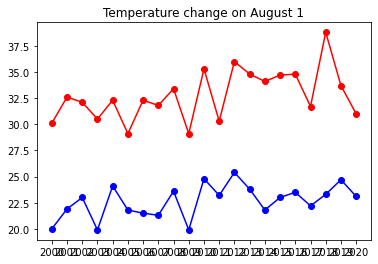

In [9]:
#출생 이후 매년 생일날의 최고 기온과 최저 기온의 변화를 라인 그래프로 그려보기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tempData = pd.read_csv('/gdrive/My Drive/소프트웨어 이해와 활용/andongTemp.csv', encoding='utf-8')
tempData.set_index('날짜', inplace=True)
highestTemp = []
lowestTemp = []
date = tempData.index
year = []
for a in range(len(tempData)):
  if int(date[a].split('-')[0]) >= 2000:
    if date[a].split('-')[1] == '08' and date[a].split('-')[2] == '01':
      row = tempData.iloc[a]
      highestTemp.append(float(row[-1]))
      lowestTemp.append(float(row[-2]))
      year.append(int(date[a].split('-')[0]))

plt.title('Temperature change on August 1')
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.xticks(np.arange(len(year)), year)
plt.rcParams["figure.figsize"] = (12, 6)
plt.show()

<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_

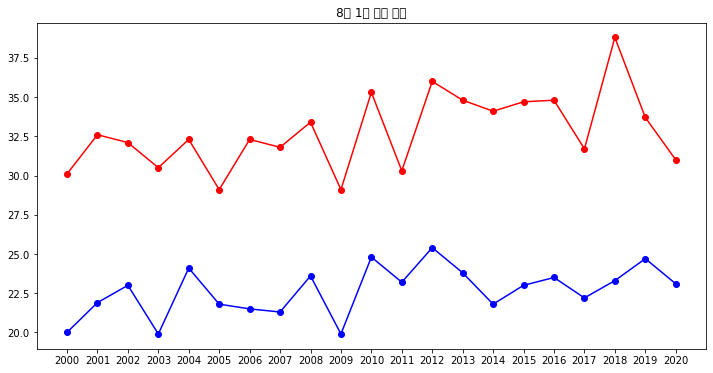

In [10]:
#그래프에 한글로 제목 표시
plt.title('8월 1일 온도 변화')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.show

In [11]:
#한글 폰트 사용하기
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [12]:
#[런타임] - [런타임 다시 시작]
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
fm._rebuild()

<function matplotlib.pyplot.show>

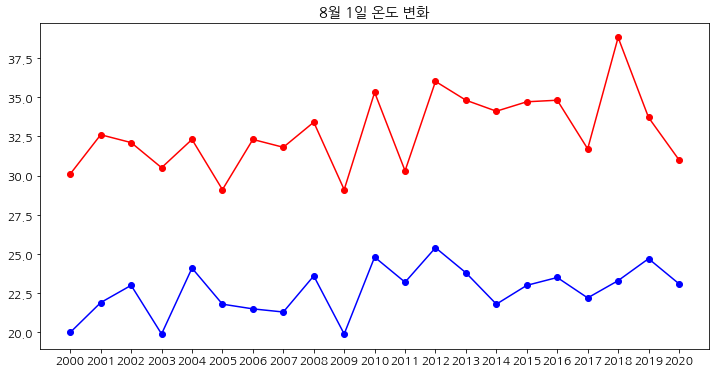

In [13]:
#그래프에 한글로 제목 표시
plt.title('8월 1일 온도 변화')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.plot(highestTemp, 'ro-')
plt.plot(lowestTemp, 'bo-')
plt.show

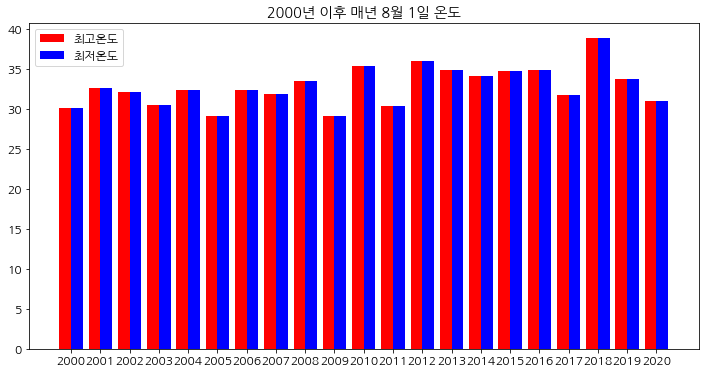

In [15]:
#최고 온도와 최저 온도를 막대 그래프로 그리기
xPos = np.arange(len(year))
plt.bar(xPos-0.2, highestTemp, label='최고온도', width=0.4, color='red')
plt.bar(xPos+0.2, highestTemp, label='최저온도', width=0.4, color='blue')
plt.xticks(np.arange(len(year)), labels=year[:])
plt.title('2000년 이후 매년 8월 1일 온도')
plt.legend()
plt.show()